# Oddball Analysis

## Setup Code (run before plotting)

In [3]:
# preparatory work
import utils
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### FILE LOCATION
datafile_path = '/Users/shariqiqbal/data/test/oddball/09_18_54on06-30-2015.tsv'

df = pd.DataFrame.from_csv(datafile_path, sep='\t') # load .tsv into dataframe
df = utils.prepdata(df) # run preparations

df = utils.timestamp_to_seconds(df, 'soundtime', 'etimes') # offtimes are the times that the flash ended in sec.
wasodd = list(df['trialvec'].dropna()==1)
wasnotodd = list(df['trialvec'].dropna()!=1)
where_odd = np.nonzero(wasodd)[0]
where_notodd = np.nonzero(wasnotodd)[0]

# PARAMETERS
tpre = -0.3
tpost = 8
plottype = 1
smwid = 2

chunklist, idx = utils.evtsplit(df, df['etimes'], tpre, tpost)

norm_data = utils.basenorm(chunklist, idx, [float('-inf'), 0], 0)

norm_pupil_corr = norm_data[idx.get_loc('MeanPupil')][where_odd]
norm_pupil_inc = norm_data[idx.get_loc('MeanPupil')][where_notodd]

## Plot

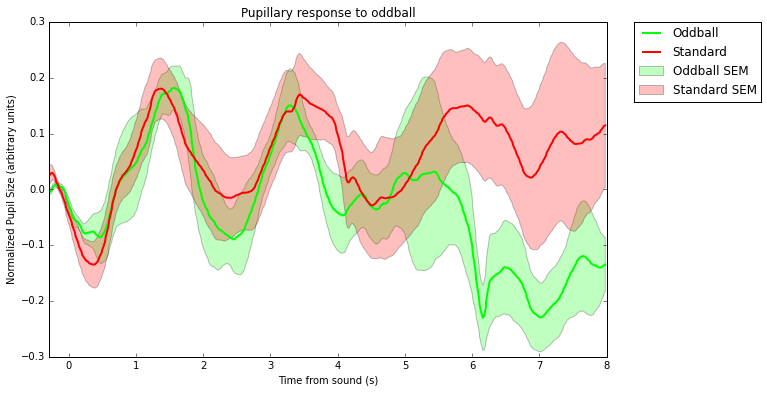

In [4]:
plt.figure(figsize=(10,6))
utils.plot_with_sem(norm_pupil_corr, smwid, plottype, norm_pupil_corr.index, [0.0,1.0,0.0])
utils.plot_with_sem(norm_pupil_inc, smwid, plottype, norm_pupil_inc.index, [1.0,0.0,0.0])
plt.xlim([tpre, tpost])
plt.title('Pupillary response to oddball');
plt.ylabel('Normalized Pupil Size (arbitrary units)');
plt.xlabel('Time from sound (s)');
if plottype == 0:
    plt.legend(['Oddball', 'Standard'], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);
elif plottype == 1:
    plt.legend(['Oddball', 'Standard', 'Oddball SEM', 'Standard SEM'], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);
elif plottype == 2:
    plt.legend(['Oddball', '', '', 'Standard'], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);
